In [1]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
from ikpy import plot_utils
import matplotlib.pyplot as plt


from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink
import numpy as np

In [7]:
chain = Chain(name='arm', links=[
    #OriginLink(),
    URDFLink(
      name="shoulder1",
      translation_vector=[0, 0, 0],
      orientation=[0, 0, 0],
      rotation=[0, 1, 0],
    ),
    URDFLink(
      name="shoulder2",
      translation_vector=[0, 0, 0],
      orientation=[0, 0, 0],
      rotation=[0, 0, 1],
    ),
     URDFLink(
      name="hand",
      translation_vector=[1, 0, 0],
      orientation=[0, 0, 0],
      rotation=[0, 0, 0],
    )
])

Inverse kinematic optimisation OK, done in 6 iterations
[-44.99999987  35.26439102   0.        ]
Inverse kinematic optimisation OK, done in 6 iterations


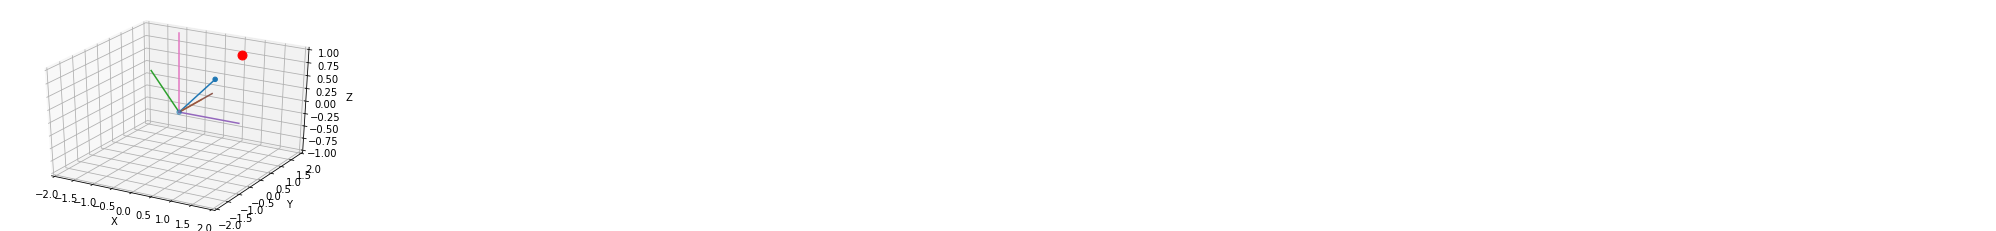

In [8]:
ax = plot_utils.init_3d_figure()

target_vector = [ 1,1,1]
target_frame = np.eye(4)
target_frame[:3, 3] = target_vector
angles = chain.inverse_kinematics(target_frame)
print(np.rad2deg(angles))
chain.plot(chain.inverse_kinematics(target_frame), ax, target_vector)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

matplotlib.pyplot.show()